# **Import Dataset**

In [ ]:
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/air quality health impact data.csv'

# Read the CSV file into a pandas DataFrame
try:
    air_quality_data = pd.read_csv(dataset_path)
    print("Dataset loaded successfully. Here are the first 5 rows:")
    print(air_quality_data.head())
except FileNotFoundError:
    print(f"Error: The file '{dataset_path}' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred while reading the dataset: {e}")

Dataset loaded successfully. Here are the first 5 rows:
   RecordID         AQI        PM10       PM2_5         NO2        SO2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971   84.443191   23.111340   96.317811  17.875850   
3         4  299.329242   21.020609   14.273403   81.234403  48.323616   
4         5   78.009320   16.987667  152.111623  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621727     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0            

# **Data Exploration**

In [ ]:
# Display the number of rows and columns
print(f"Number of rows: {air_quality_data.shape[0]}")
print(f"Number of columns: {air_quality_data.shape[1]}")

# Display information about the dataset, including data types and non-null values
print("\nDataset Information:")
air_quality_data.info()

Number of rows: 5811
Number of columns: 15

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    58

In [ ]:
# Display integer columns
print("\nInteger columns:")
print(air_quality_data.select_dtypes(include=['int64']).columns.tolist())

# Display float columns
print("\nFloat columns:")
print(air_quality_data.select_dtypes(include=['float64']).columns.tolist())

# Display object columns (if any)
print("\nObject columns:")
print(air_quality_data.select_dtypes(include=['object']).columns.tolist())


Integer columns:
['RecordID', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']

Float columns:
['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'HealthImpactScore']

Object columns:
[]


In [ ]:
# select the integer variables
integer_columns = ['RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactClass']
# count the distinct values in each integer variable
print("Value Counts for Integer Variables:")
for col in integer_columns:
    print(f"\n--- Value Counts for {col} ---")
    print(air_quality_data[col].value_counts().sort_index())

Value Counts for Integer Variables:

--- Value Counts for RespiratoryCases ---
RespiratoryCases
1       4
2      16
3      48
4     114
5     238
6     351
7     475
8     634
9     762
10    751
11    679
12    560
13    435
14    295
15    189
16    109
17     72
18     41
19     21
20     11
21      4
22      1
23      1
Name: count, dtype: int64

--- Value Counts for CardiovascularCases ---
CardiovascularCases
0       39
1      210
2      448
3      813
4     1062
5     1033
6      864
7      577
8      376
9      208
10     107
11      47
12      14
13       7
14       6
Name: count, dtype: int64

--- Value Counts for HospitalAdmissions ---
HospitalAdmissions
0      772
1     1552
2     1615
3     1041
4      561
5      179
6       60
7       28
8        2
12       1
Name: count, dtype: int64

--- Value Counts for HealthImpactClass ---
HealthImpactClass
0    4808
1     579
2     273
3      95
4      56
Name: count, dtype: int64


In [ ]:
# Show missing values in each column
print("Missing values in each column:")
print(air_quality_data.isnull().sum())

Missing values in each column:
RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


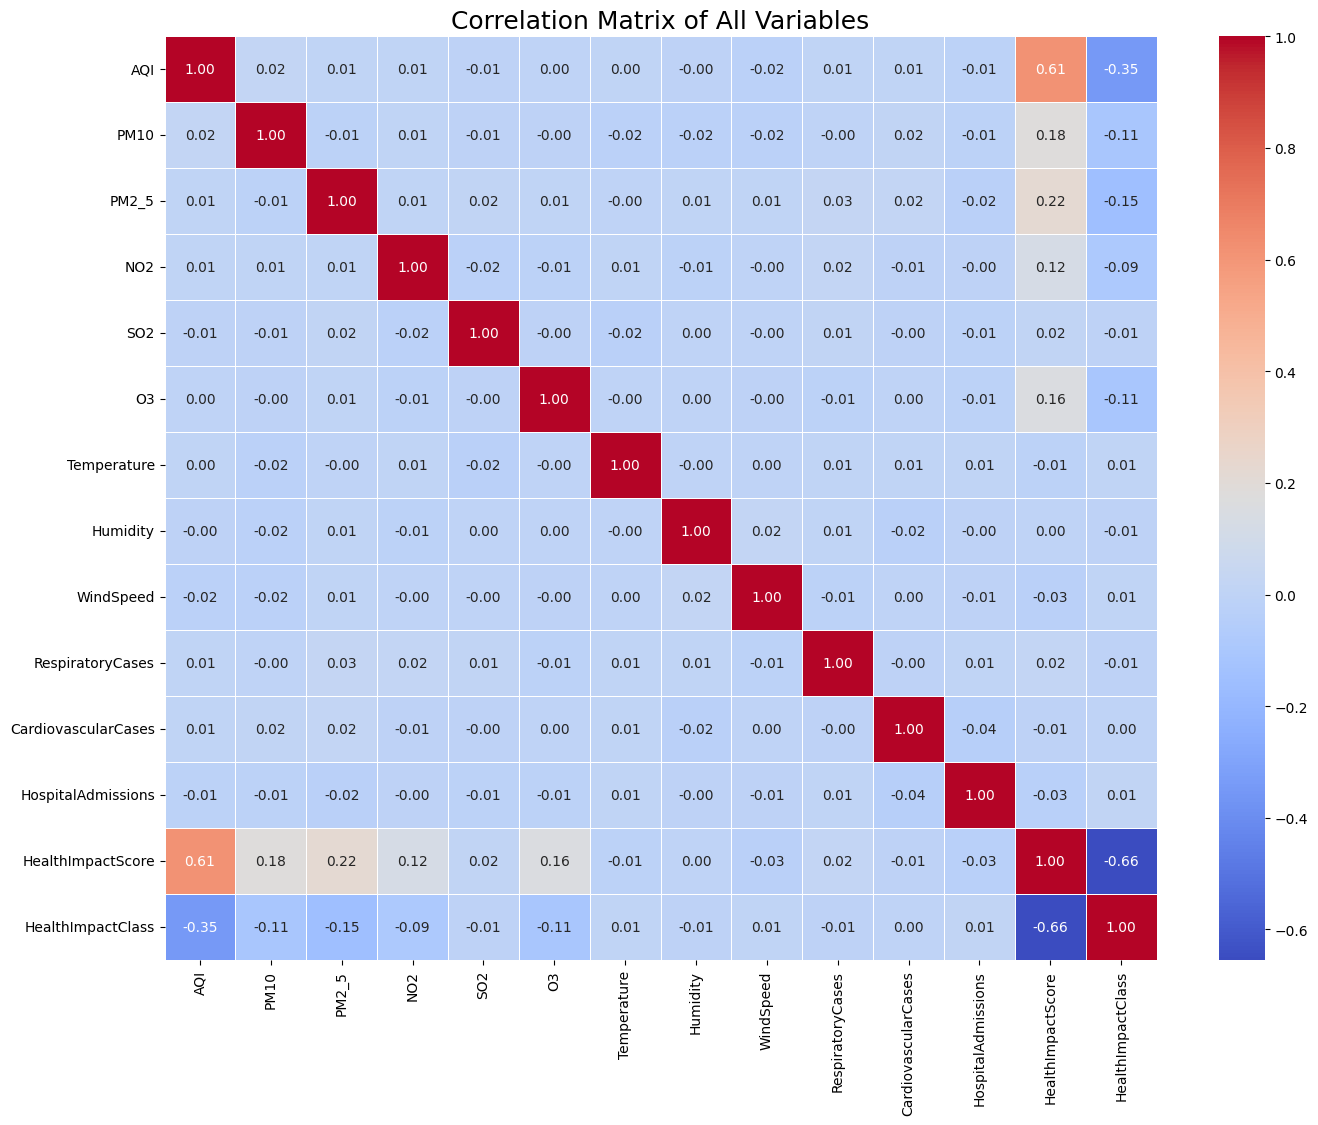

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop 'RecordID' column as it is an identifier and not relevant for correlation analysis
data_for_correlation = air_quality_data.drop(columns=['RecordID'])

# Calculate the correlation matrix for the remaining variables
correlation_matrix = data_for_correlation.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Variables', fontsize=18)
plt.show()

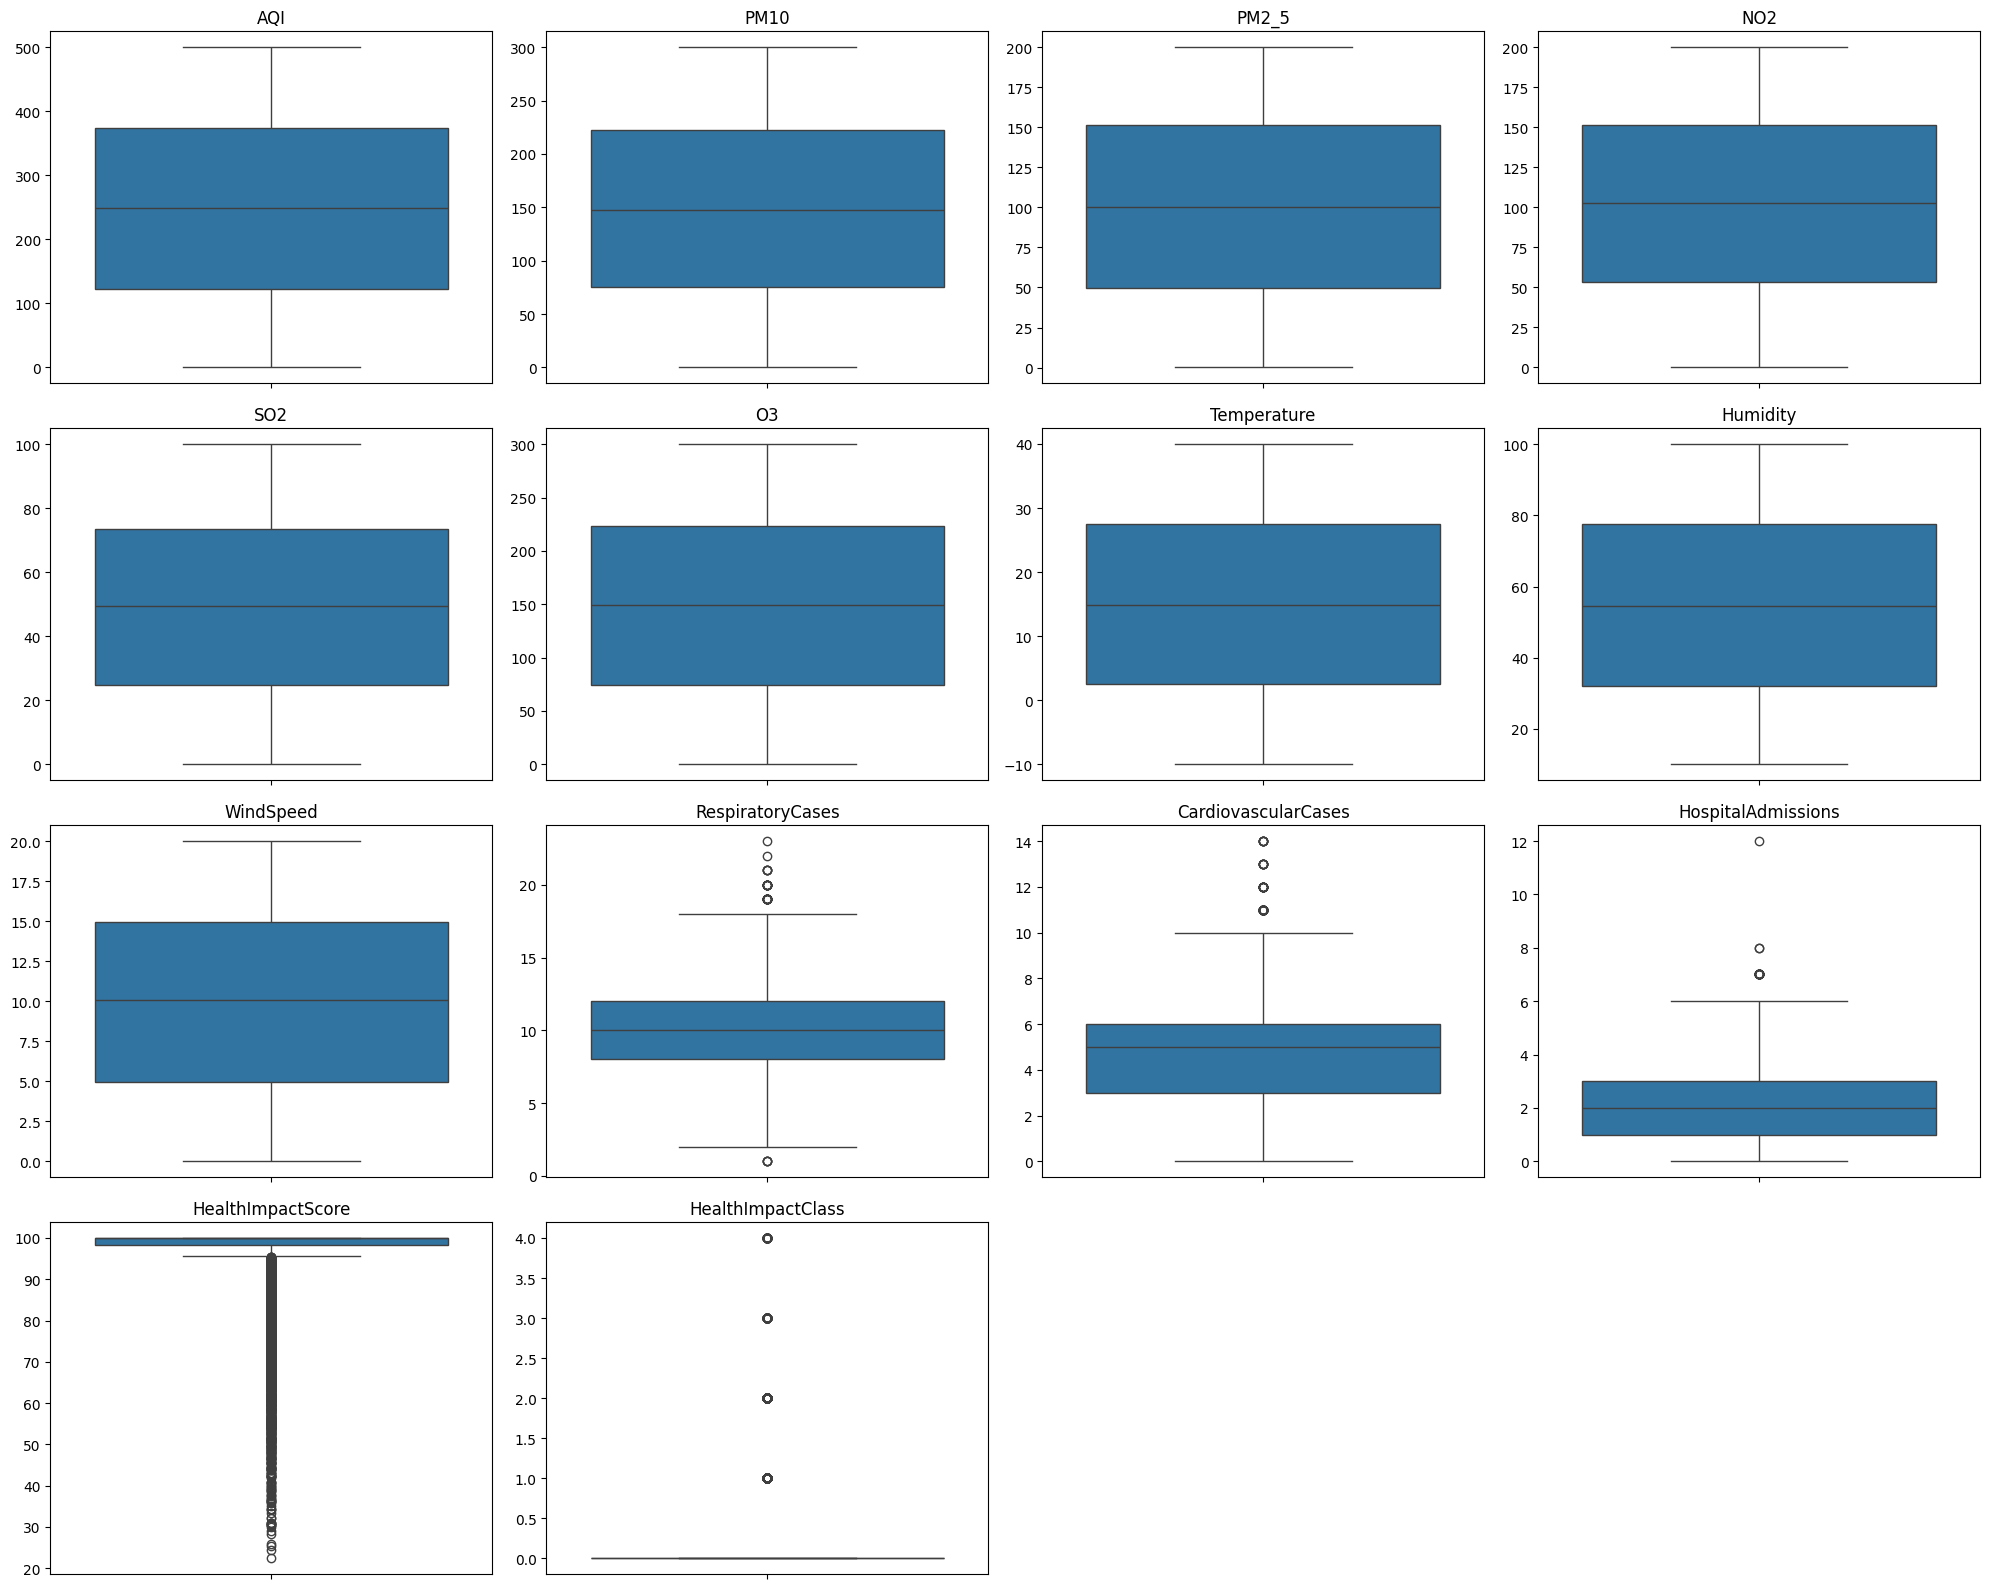

In [ ]:
# Get all column names except 'RecordID'
columns_to_plot = air_quality_data.drop(columns=['RecordID']).columns

# Determine the number of subplots per row/figure
n_cols = 4 # You can adjust this to 3 or 4
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols # Calculate required rows

# Create subplots for each variable
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(columns_to_plot):
    if i < len(columns_to_plot):
        sns.boxplot(y=air_quality_data[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_ylabel('') # Remove y-label to avoid clutter

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

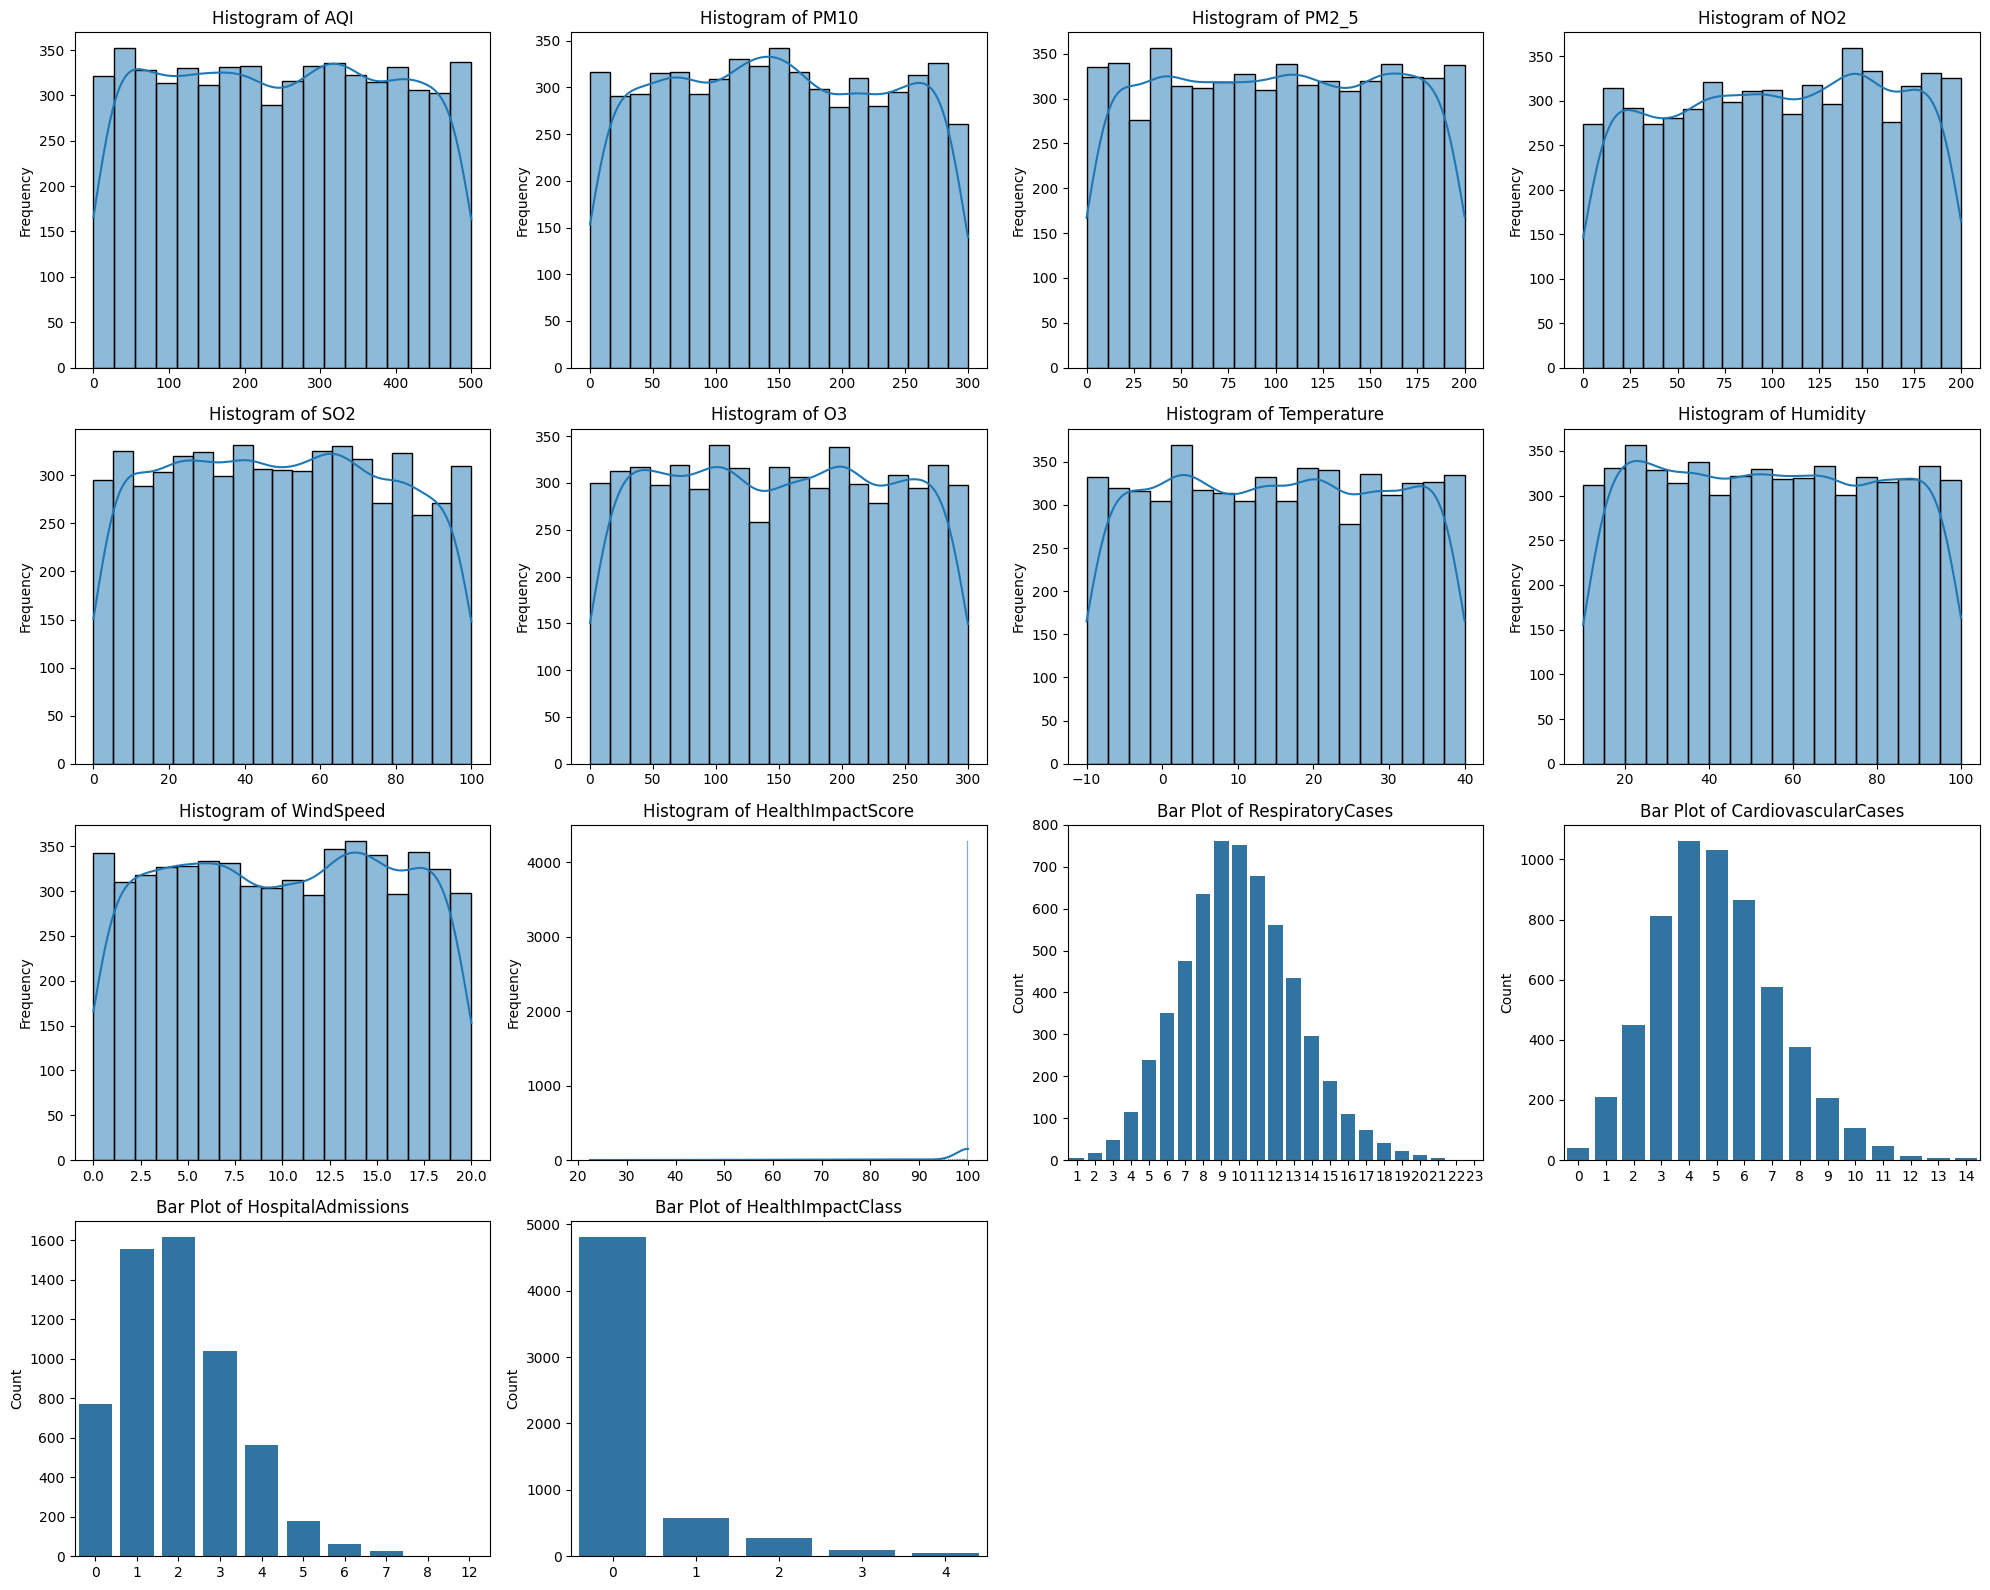

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate columns by data type
float_cols = air_quality_data.select_dtypes(include=['float64']).columns.tolist()
integer_cols = air_quality_data.select_dtypes(include=['int64']).columns.tolist()

# Drop 'RecordID' as it's an identifier and not suitable for distribution analysis
integer_cols = [col for col in integer_cols if col != 'RecordID']

all_cols_for_dist = float_cols + integer_cols

# Determine the number of subplots per row/figure
n_cols = 4
n_rows = (len(all_cols_for_dist) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(all_cols_for_dist):
    if col in float_cols:
        sns.histplot(air_quality_data[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_ylabel('Frequency')
    elif col in integer_cols:
        # For integer columns, a countplot is more appropriate than histplot for discrete values
        sns.countplot(x=air_quality_data[col], ax=axes[i])
        axes[i].set_title(f'Bar Plot of {col}')
        axes[i].set_ylabel('Count')
    axes[i].set_xlabel('') # Remove x-label to avoid clutter

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [ ]:
# Identify duplicate rows
duplicate_rows = air_quality_data[air_quality_data.duplicated()]

# Print the number of duplicate rows found
print(f"Number of duplicate rows found: {duplicate_rows.shape[0]}")

# Display the duplicate rows (optional, only if there are duplicates)
if not duplicate_rows.empty:
    print("\nDuplicate Rows (first 5 if any):")
    print(duplicate_rows.head())

Number of duplicate rows found: 0


In [ ]:
numerical_cols = air_quality_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude 'RecordID' as it's an identifier
if 'RecordID' in numerical_cols:
    numerical_cols.remove('RecordID')

outlier_summary = {}

for col in numerical_cols:
    Q1 = air_quality_data[col].quantile(0.25)
    Q3 = air_quality_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = air_quality_data[(air_quality_data[col] < lower_bound) | (air_quality_data[col] > upper_bound)]

    if not outliers.empty:
        outlier_summary[col] = {
            'num_outliers': len(outliers),
            'percentage': (len(outliers) / len(air_quality_data)) * 100,
            'outlier_values_sample': outliers[col].unique().tolist() # Get unique outlier values
        }

if outlier_summary:
    print("Outliers identified using IQR method:")
    for col, info in outlier_summary.items():
        print(f"\n--- Column: {col} ---")
        print(f"Number of outliers: {info['num_outliers']}")
        print(f"Percentage of outliers: {info['percentage']:.2f}%")
        # Print a sample of outlier values to avoid printing too many if there are many unique ones
        if len(info['outlier_values_sample']) > 10:
            print(f"Sample of unique outlier values: {info['outlier_values_sample'][:5]}... {info['outlier_values_sample'][-5:]}")
        else:
            print(f"Unique outlier values: {info['outlier_values_sample']}")
else:
    print("No significant outliers found using the IQR method in any numerical column.")

Outliers identified using IQR method:

--- Column: RespiratoryCases ---
Number of outliers: 42
Percentage of outliers: 0.72%
Unique outlier values: [20, 19, 21, 1, 23, 22]

--- Column: CardiovascularCases ---
Number of outliers: 74
Percentage of outliers: 1.27%
Unique outlier values: [11, 13, 12, 14]

--- Column: HospitalAdmissions ---
Number of outliers: 31
Percentage of outliers: 0.53%
Unique outlier values: [7, 12, 8]

--- Column: HealthImpactScore ---
Number of outliers: 1352
Percentage of outliers: 23.27%
Sample of unique outlier values: [95.18264321, 70.36149125, 65.81994867, 63.12113326, 71.64276283]... [67.80100799, 75.39683889, 82.1386409, 59.91500013, 81.66829811]

--- Column: HealthImpactClass ---
Number of outliers: 1003
Percentage of outliers: 17.26%
Unique outlier values: [1, 3, 2, 4]


In [ ]:
import numpy as np
numerical_cols_to_handle = air_quality_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude 'RecordID', 'HealthImpactClass', and 'HealthImpactScore' from outlier handling
exclude_cols = ['RecordID', 'HealthImpactClass', 'HealthImpactScore']
for col in exclude_cols:
    if col in numerical_cols_to_handle:
        numerical_cols_to_handle.remove(col)

print("Handling outliers for the following columns:", numerical_cols_to_handle)

outliers_handled_cols = []
for col in numerical_cols_to_handle:
    Q1 = air_quality_data[col].quantile(0.25)
    Q3 = air_quality_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    # Check if there are any outliers to cap in the current column
    if (air_quality_data[col] < lower_bound).any() or (air_quality_data[col] > upper_bound).any():
        air_quality_data[col] = np.where(air_quality_data[col] < lower_bound, lower_bound, air_quality_data[col])
        air_quality_data[col] = np.where(air_quality_data[col] > upper_bound, upper_bound, air_quality_data[col])
        outliers_handled_cols.append(col)

if outliers_handled_cols:
    print("\nOutliers handled by capping for columns:", outliers_handled_cols)
    print("\nUpdated descriptive statistics for a sample of handled columns:")
    print(air_quality_data[outliers_handled_cols].describe())
else:
    print("\nNo outliers were found or handled in the specified columns.")

# Verify the change by re-running outlier detection for handled columns
print("\nRe-checking for outliers in handled columns:")
outlier_summary_after_capping = {}

for col in outliers_handled_cols:
    Q1 = air_quality_data[col].quantile(0.25)
    Q3 = air_quality_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = air_quality_data[(air_quality_data[col] < lower_bound) | (air_quality_data[col] > upper_bound)]

    if not outliers.empty:
        outlier_summary_after_capping[col] = {
            'num_outliers': len(outliers),
            'percentage': (len(outliers) / len(air_quality_data)) * 100
        }

if outlier_summary_after_capping:
    print("Outliers still detected (after capping) in:")
    for col, info in outlier_summary_after_capping.items():
        print(f"  - {col}: {info['num_outliers']} ({info['percentage']:.2f}%) outliers")
else:
    print("No outliers detected in the handled columns after capping.")

Handling outliers for the following columns: ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions']

Outliers handled by capping for columns: ['RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions']

Updated descriptive statistics for a sample of handled columns:
       RespiratoryCases  CardiovascularCases  HospitalAdmissions
count       5811.000000          5811.000000         5811.000000
mean           9.963862             4.974703            1.994493
std            3.095008             2.174598            1.375456
min            2.000000             0.000000            0.000000
25%            8.000000             3.000000            1.000000
50%           10.000000             5.000000            2.000000
75%           12.000000             6.000000            3.000000
max           18.000000            10.500000            6.000000

Re-checking for outliers in handled columns:
N

In [ ]:
air_quality_data = air_quality_data.drop(columns=['RecordID'])
print(" 'RecordID' column dropped. Current columns are:")
print(air_quality_data.columns.tolist())

 'RecordID' column dropped. Current columns are:
['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']


Explained Variance Ratio by Principal Component:
[0.13228934 0.08147398 0.08085468 0.07965092 0.07909859 0.07732676
 0.0760147  0.07574771 0.0747839  0.07400507 0.07333858 0.0723785
 0.02303727]

Cumulative Explained Variance by Principal Component:
[0.13228934 0.21376332 0.294618   0.37426892 0.45336751 0.53069427
 0.60670897 0.68245668 0.75724057 0.83124564 0.90458423 0.97696273
 1.        ]


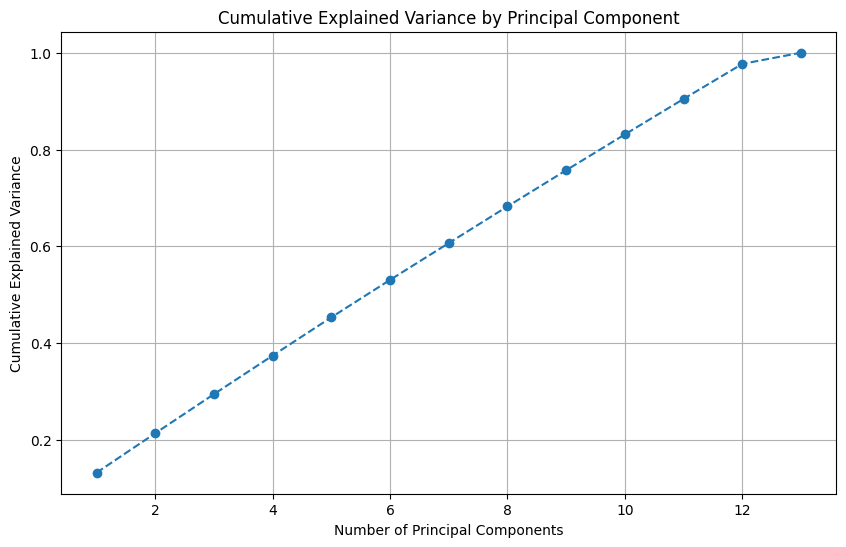


Considering the first 12 principal components (explaining >95% variance) for feature importance.

Feature Importance based on PCA Loadings (sum of absolute values across top components):

RespiratoryCases       3.073256
WindSpeed              3.061028
NO2                    3.059007
PM10                   3.036258
Temperature            2.946926
HospitalAdmissions     2.896535
SO2                    2.886819
PM2_5                  2.862597
O3                     2.783301
CardiovascularCases    2.686236
Humidity               2.603743
AQI                    1.804563
HealthImpactScore      0.856841
dtype: float64


/tmp/ipython-input-3230599806.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_pca.values, y=feature_importance_pca.index, palette='viridis')


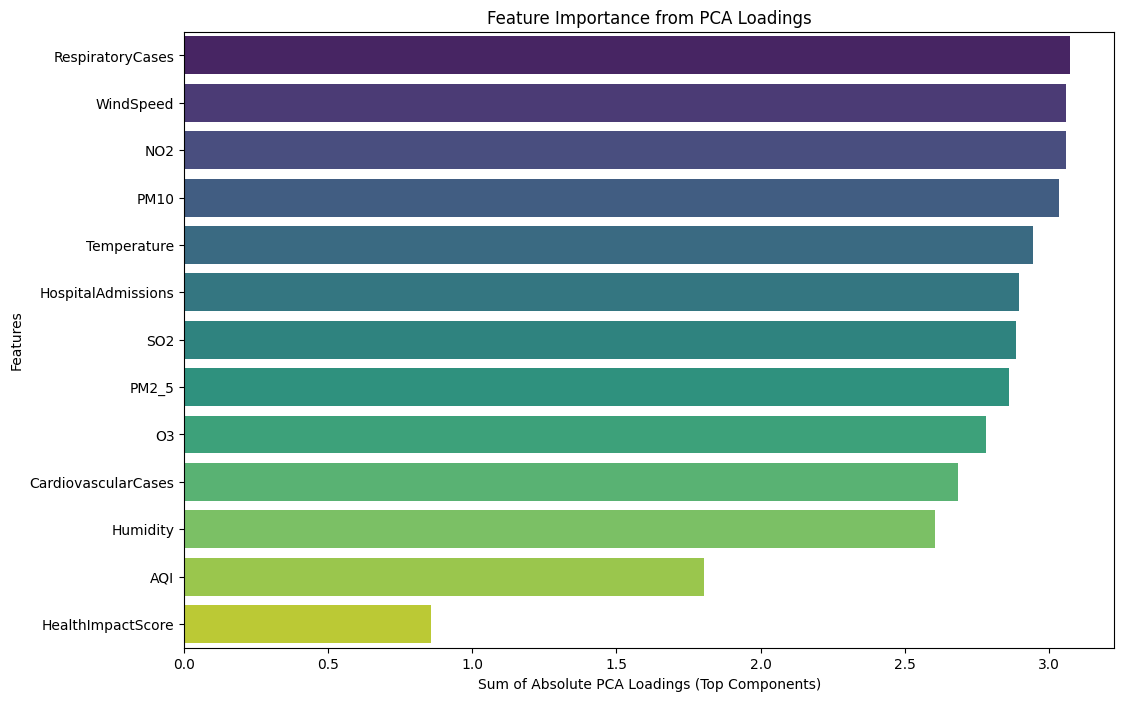

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare the data for PCA
# Drop 'HealthImpactClass' as they are not features for this analysis.
# 'HealthImpactClass' is likely a target variable.
X = air_quality_data.drop(columns=['HealthImpactClass'])
y = air_quality_data['HealthImpactClass'] # Keep y separate if needed later

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio by Principal Component:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance by Principal Component:")
print(cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Feature Importance (Loadings) - by examining the absolute values of the components' eigenvectors
# Convert loadings to a DataFrame for easier interpretation
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# To get a general sense of 'feature importance', we can sum the absolute values of loadings
# across the principal components, often focusing on components that explain significant variance.
# For simplicity, let's consider the top N components (e.g., those explaining 95% of variance).

# Determine how many components explain a significant portion of variance (e.g., >95%)
n_components_to_consider = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"\nConsidering the first {n_components_to_consider} principal components (explaining >95% variance) for feature importance.")

# Sum the absolute loadings for these components for each feature
feature_importance_pca = loadings.iloc[:, :n_components_to_consider].abs().sum(axis=1).sort_values(ascending=False)

print("\nFeature Importance based on PCA Loadings (sum of absolute values across top components):\n")
print(feature_importance_pca)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_pca.values, y=feature_importance_pca.index, palette='viridis')
plt.title('Feature Importance from PCA Loadings')
plt.xlabel('Sum of Absolute PCA Loadings (Top Components)')
plt.ylabel('Features')
plt.show()


Feature Importance using Random Forest Classifier:

HealthImpactClass      0.551457
AQI                    0.120651
PM2_5                  0.050603
PM10                   0.044855
O3                     0.037769
NO2                    0.031526
SO2                    0.029268
WindSpeed              0.029058
Temperature            0.028378
Humidity               0.028184
RespiratoryCases       0.020266
CardiovascularCases    0.015981
HospitalAdmissions     0.012005
dtype: float64


/tmp/ipython-input-906335964.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')


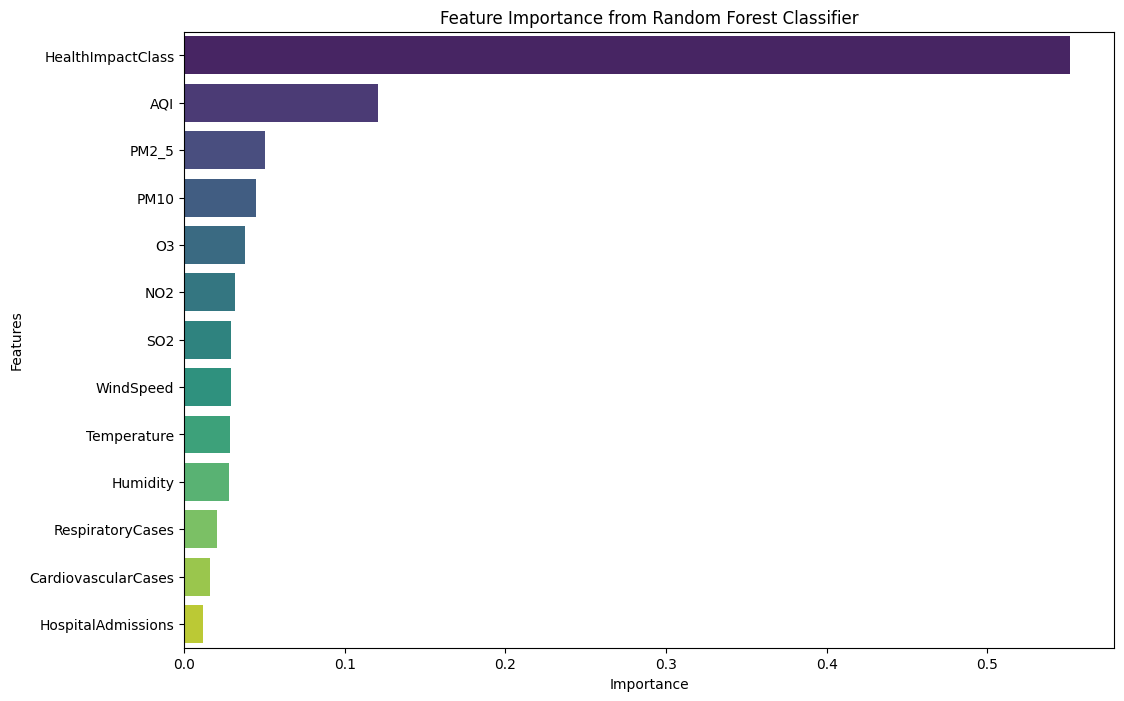


Random Forest Classifier Accuracy on Test Set: 0.9989


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features (X) and target (y)
# 'HealthImpactClass' is the target variable
X = air_quality_data.drop(columns=['HealthImpactScore']) # Features
y = air_quality_data['HealthImpactClass'] # Target variable

# Split data into training and testing sets (optional for just feature importance, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
# Using a reasonable number of estimators and a random state for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a pandas Series for better visualization and sorting
features_df = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance using Random Forest Classifier:\n")
print(features_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Optionally, evaluate the model's performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Classifier Accuracy on Test Set: {accuracy:.4f}")

In [ ]:
air_quality_data.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7.0,5.0,1.0,97.244041,0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621727,1.543378,46.851415,4.521422,10.0,2.0,0.0,100.000000,0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13.0,3.0,0.0,100.000000,0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8.0,8.0,1.0,100.000000,0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9.0,0.0,1.0,95.182643,0


In [ ]:
# 1. Create a DataFrame pca_ranks with features and their corresponding ranks
pca_ranks = pd.DataFrame(feature_importance_pca.index)
pca_ranks.columns = ['Feature']
pca_ranks['PCA_Rank'] = feature_importance_pca.rank(ascending=False).astype(int).values

# 2. Create a DataFrame rf_ranks with features and their corresponding ranks
rf_ranks = pd.DataFrame(features_df.index)
rf_ranks.columns = ['Feature']
rf_ranks['RF_Rank'] = features_df.rank(ascending=False).astype(int).values

# 3. Combine pca_ranks and rf_ranks into a single DataFrame
combined_ranks = pd.merge(pca_ranks, rf_ranks, on='Feature', how='outer')

# Fill NaN values with the maximum rank + 1 to penalize features not present in both analyses
max_rank_pca = pca_ranks['PCA_Rank'].max()
max_rank_rf = rf_ranks['RF_Rank'].max()

combined_ranks['PCA_Rank'] = combined_ranks['PCA_Rank'].fillna(max_rank_pca + 1)
combined_ranks['RF_Rank'] = combined_ranks['RF_Rank'].fillna(max_rank_rf + 1)

# Ensure ranks are integer type
combined_ranks['PCA_Rank'] = combined_ranks['PCA_Rank'].astype(int)
combined_ranks['RF_Rank'] = combined_ranks['RF_Rank'].astype(int)

# 4. Calculate the average rank for each feature
combined_ranks['Average_Rank'] = (combined_ranks['PCA_Rank'] + combined_ranks['RF_Rank']) / 2

# 5. Sort the features by their average rank in ascending order
final_feature_ranking = combined_ranks.sort_values(by='Average_Rank', ascending=True)

print("Combined Feature Importance Ranking (Averaged Ranks):")
print(final_feature_ranking)

# Select the top 12 features
top_12_features = final_feature_ranking.head(12)
print("\nTop 12 features based on combined ranking:")
print(top_12_features)

Combined Feature Importance Ranking (Averaged Ranks):
                Feature  PCA_Rank  RF_Rank  Average_Rank
8                  PM10         4        4           4.0
6                   NO2         3        6           4.5
13            WindSpeed         2        8           5.0
9                 PM2_5         8        3           5.5
10     RespiratoryCases         1       11           6.0
0                   AQI        12        2           7.0
7                    O3         9        5           7.0
11                  SO2         7        7           7.0
12          Temperature         5        9           7.0
2     HealthImpactClass        14        1           7.5
4    HospitalAdmissions         6       13           9.5
5              Humidity        11       10          10.5
1   CardiovascularCases        10       12          11.0
3     HealthImpactScore        13       14          13.5

Top 12 features based on combined ranking:
               Feature  PCA_Rank  RF_Rank  Aver

In [ ]:
selected_features = final_feature_ranking['Feature'].head(12).tolist()

# Remove 'HealthImpactClass' from the selected features if it's present, as it is the target variable
if 'HealthImpactClass' in selected_features:
    selected_features.remove('HealthImpactClass')

# Prepare features (X) using the selected top features
X = air_quality_data[selected_features]

# Prepare target (y)
y = air_quality_data['HealthImpactClass']

print("Selected Features for X:")
print(X.columns.tolist())
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 values of y:")
print(y.head())

Selected Features for X:
['PM10', 'NO2', 'WindSpeed', 'PM2_5', 'RespiratoryCases', 'AQI', 'O3', 'SO2', 'Temperature', 'HospitalAdmissions', 'Humidity']

Shape of X: (5811, 11)
Shape of y: (5811,)

First 5 rows of X:
         PM10         NO2  WindSpeed       PM2_5  RespiratoryCases  \
0  295.853039    6.639263   6.137755   13.038560               7.0   
1  246.254703   16.318326   4.521422    9.984497              10.0   
2   84.443191   96.317811  11.157384   23.111340              13.0   
3   21.020609   81.234403  15.302500   14.273403               8.0   
4   16.987667  121.235461  14.534733  152.111623               9.0   

          AQI          O3        SO2  Temperature  HospitalAdmissions  \
0  187.270059   54.624280  66.161150     5.150335                 1.0   
1  475.357153  169.621727  90.499523     1.543378                 0.0   
2  365.996971    9.006794  17.875850     1.169483                 0.0   
3  299.329242   93.161033  48.323616    21.925276                 1.0  

# **Models Development**

## **Data Preparation**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Split data into training and testing sets *before* applying SMOTE
# Using stratify=y to maintain the proportion of classes in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE *only to the training data*
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Class distribution of y_train before SMOTE:\n", y_train.value_counts())

print("\nShape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train after SMOTE:\n", y_train_resampled.shape)
print("Class distribution of y_train after SMOTE:\n", y_train_resampled.value_counts())

# The original X_test and y_test remain unchanged for unbiased evaluation
print("\nShape of X_test (unchanged):", X_test.shape)
print("Shape of y_test (unchanged):", y_test.shape)
print("Class distribution of y_test (unchanged):\n", y_test.value_counts())

Shape of X_train before SMOTE: (4067, 11)
Shape of y_train before SMOTE: (4067,)
Class distribution of y_train before SMOTE:
 HealthImpactClass
0    3365
1     405
2     191
3      67
4      39
Name: count, dtype: int64

Shape of X_train after SMOTE: (16825, 11)
Shape of y_train after SMOTE:
 (16825,)
Class distribution of y_train after SMOTE:
 HealthImpactClass
0    3365
2    3365
1    3365
3    3365
4    3365
Name: count, dtype: int64

Shape of X_test (unchanged): (1744, 11)
Shape of y_test (unchanged): (1744,)
Class distribution of y_test (unchanged):
 HealthImpactClass
0    1443
1     174
2      82
3      28
4      17
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on original training data (before SMOTE) and transform the SMOTE-resampled training data and the test data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")
print(f"X_train_resampled_scaled shape: {X_train_resampled_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"y_test shape: {y_test.shape}")


Data scaled successfully.
X_train_resampled_scaled shape: (16825, 11)
X_test_scaled shape: (1744, 11)
y_train_resampled shape: (16825,)
y_test shape: (1744,)


## **LightGBM Model**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the LightGBM Classifier
lgbm_classifier = lgb.LGBMClassifier(objective='multiclass', num_class=len(y.unique()), random_state=42)

# Train the model using SMOTE-resampled training data
lgbm_classifier.fit(X_train_resampled_scaled, y_train_resampled)

print("LightGBM Classifier trained successfully with SMOTE data.")

# Make predictions on test set
y_pred_lgbm = lgbm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"\nLightGBM Classifier Accuracy on Test Set: {accuracy_lgbm:.4f}")

print("\nClassification Report for LightGBM (with SMOTE):")
print(classification_report(y_test, y_pred_lgbm, zero_division=0))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 16825, number of used features: 11
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
LightGBM Classifier trained successfully with SMOTE data.

LightGBM Classifier Accuracy on Test Set: 0.8991

Classification Report for LightGBM (with SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1443
           1       0.67      0.70      0.68       174
           2       0.59      0.51      0.55        82
           3       0.55      0.21      0.31        28
           4

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


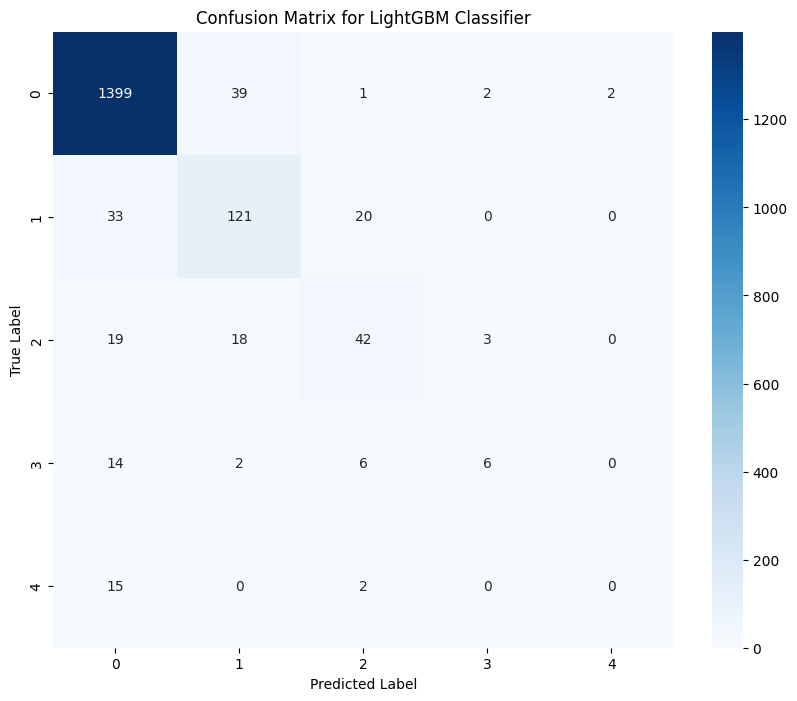

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
lgbm_cm = confusion_matrix(y_test, y_pred_lgbm)

# Get unique class labels for better visualization
class_labels = sorted(y.unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for LightGBM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **XGBoost Model**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier
# Using 'multi:softmax' for multiclass classification and 'num_class' for the number of unique classes
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42, eval_metric='mlogloss')

# Train the model using SMOTE-resampled training data
xgb_classifier.fit(X_train_resampled_scaled, y_train_resampled)

print("XGBoost Classifier trained successfully.")

# Make predictions on test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nXGBoost Classifier Accuracy on Test Set: {accuracy_xgb:.4f}")

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

XGBoost Classifier trained successfully.

XGBoost Classifier Accuracy on Test Set: 0.9048

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1443
           1       0.71      0.70      0.70       174
           2       0.62      0.49      0.55        82
           3       0.55      0.21      0.31        28
           4       0.00      0.00      0.00        17

    accuracy                           0.90      1744
   macro avg       0.56      0.48      0.50      1744
weighted avg       0.89      0.90      0.90      1744



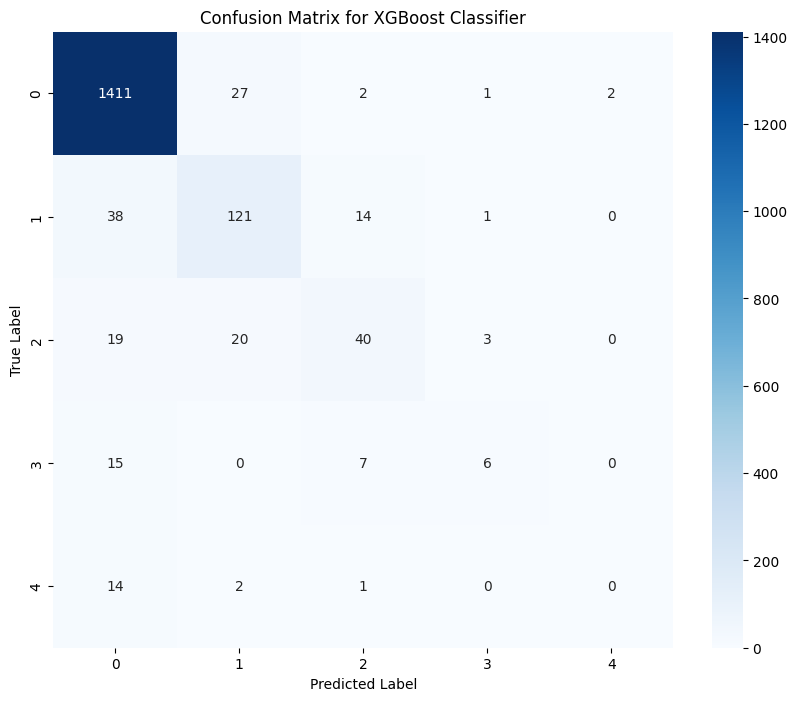

In [ ]:
# Calculate the confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Get unique class labels for better visualization
class_labels = sorted(y.unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Random Forest Model**

Random Forest Classifier trained successfully.

Random Forest Classifier Accuracy on Test Set: 0.9008

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1443
           1       0.64      0.78      0.71       174
           2       0.70      0.46      0.56        82
           3       0.58      0.25      0.35        28
           4       0.25      0.06      0.10        17

    accuracy                           0.90      1744
   macro avg       0.63      0.50      0.53      1744
weighted avg       0.89      0.90      0.89      1744



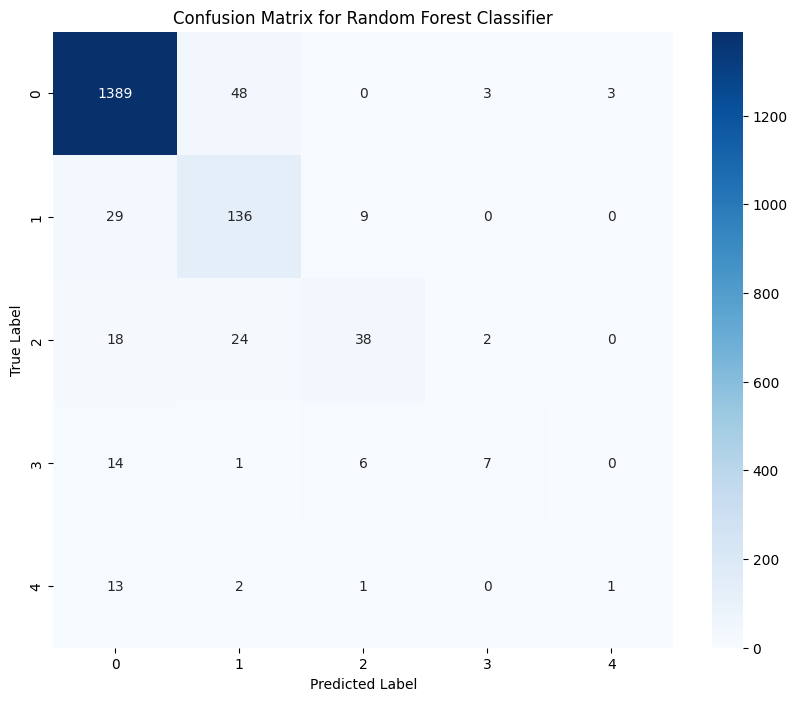

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
# Using 'class_weight="balanced"' to handle potential class imbalance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model using SMOTE-resampled training data
rf_classifier.fit(X_train_resampled_scaled, y_train_resampled)

print("Random Forest Classifier trained successfully.")

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Classifier Accuracy on Test Set: {accuracy_rf:.4f}")

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Calculate the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Get unique class labels for better visualization
class_labels = sorted(y.unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Hyperparameters Tuning**

Starting GridSearchCV for LightGBM...
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 16825, number of used features: 11
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM Tuned Classifier Accuracy on Test Set: 0.9094

Classification Report for Tuned LightGBM:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1443
           1       0.73      0.70      0.71       174
           2       0.66      0.54      0.59        82
           3       0.67      0.21      0.32        28
           4       0.00      0.00      0.00        17

    accuracy                           0.91      1744
   macro avg       0.60      0.49      0.52      1744
weighted avg       0.89      0.91      0.90      1744



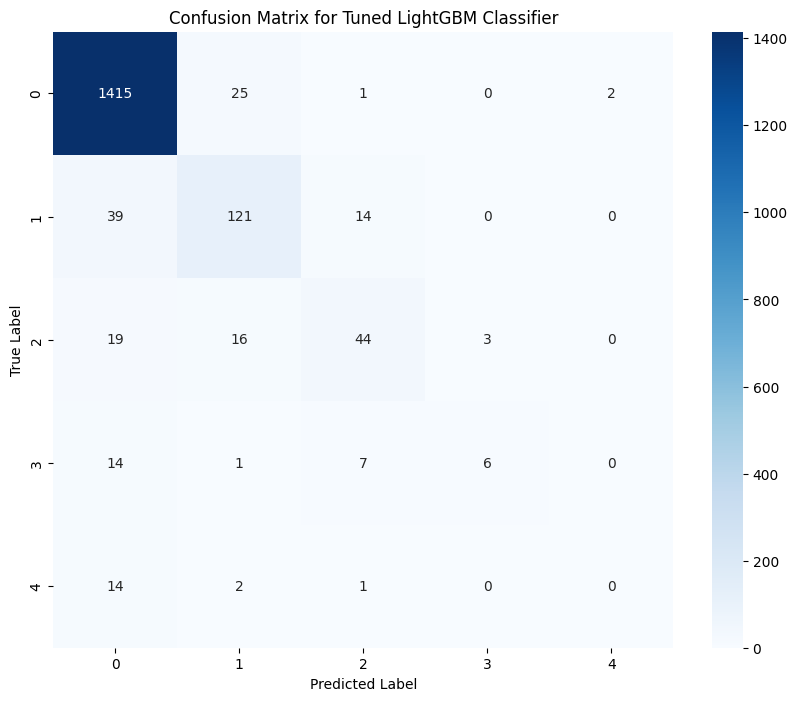

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define the LightGBM Classifier
lgbm = lgb.LGBMClassifier(objective='multiclass', num_class=len(y.unique()), random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
# Using 'f1_weighted' as the scoring metric for multi-class classification with imbalance
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the SMOTE-resampled and scaled training data
print("Starting GridSearchCV for LightGBM...")
grid_search.fit(X_train_resampled_scaled, y_train_resampled)
print("GridSearchCV finished.")

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation F1-weighted score: {:.4f}".format(grid_search.best_score_))

# Get the best estimator (tuned LightGBM model)
best_lgbm_model = grid_search.best_estimator_

# Make predictions on the scaled test set using the best model
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_lgbm_tuned = accuracy_score(y_test, y_pred_lgbm_tuned)
print(f"\nLightGBM Tuned Classifier Accuracy on Test Set: {accuracy_lgbm_tuned:.4f}")

print("\nClassification Report for Tuned LightGBM:")
print(classification_report(y_test, y_pred_lgbm_tuned, zero_division=0))

# Calculate and plot the confusion matrix for the tuned model
lgbm_tuned_cm = confusion_matrix(y_test, y_pred_lgbm_tuned)
class_labels = sorted(y.unique())

plt.figure(figsize=(10, 8))
sns.heatmap(lgbm_tuned_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Tuned LightGBM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Models Performance Comparison**

Model Accuracy Comparison:
                Model  Accuracy
3    LightGBM (Tuned)  0.909404
1             XGBoost  0.904817
2       Random Forest  0.900803
0  LightGBM (Untuned)  0.899083


/tmp/ipython-input-2270554838.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


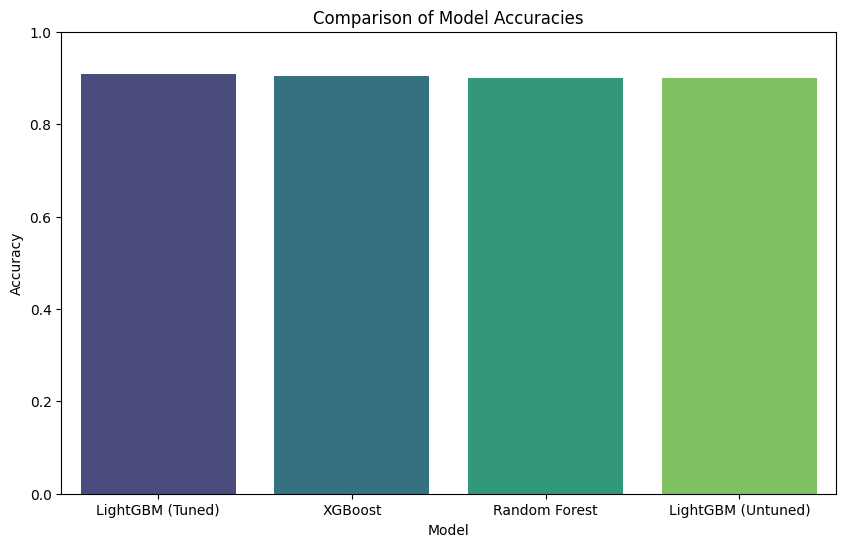

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary of model accuracies, including the tuned LightGBM model
model_accuracies = {
    'LightGBM (Untuned)': accuracy_lgbm,
    'XGBoost': accuracy_xgb,
    'Random Forest': accuracy_rf,
    'LightGBM (Tuned)': accuracy_lgbm_tuned
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy for better visualization
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print("Model Accuracy Comparison:")
print(accuracy_df)

# Plot the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()